# Benchmark

https://deeplizard.com/resource/pavq7noze3

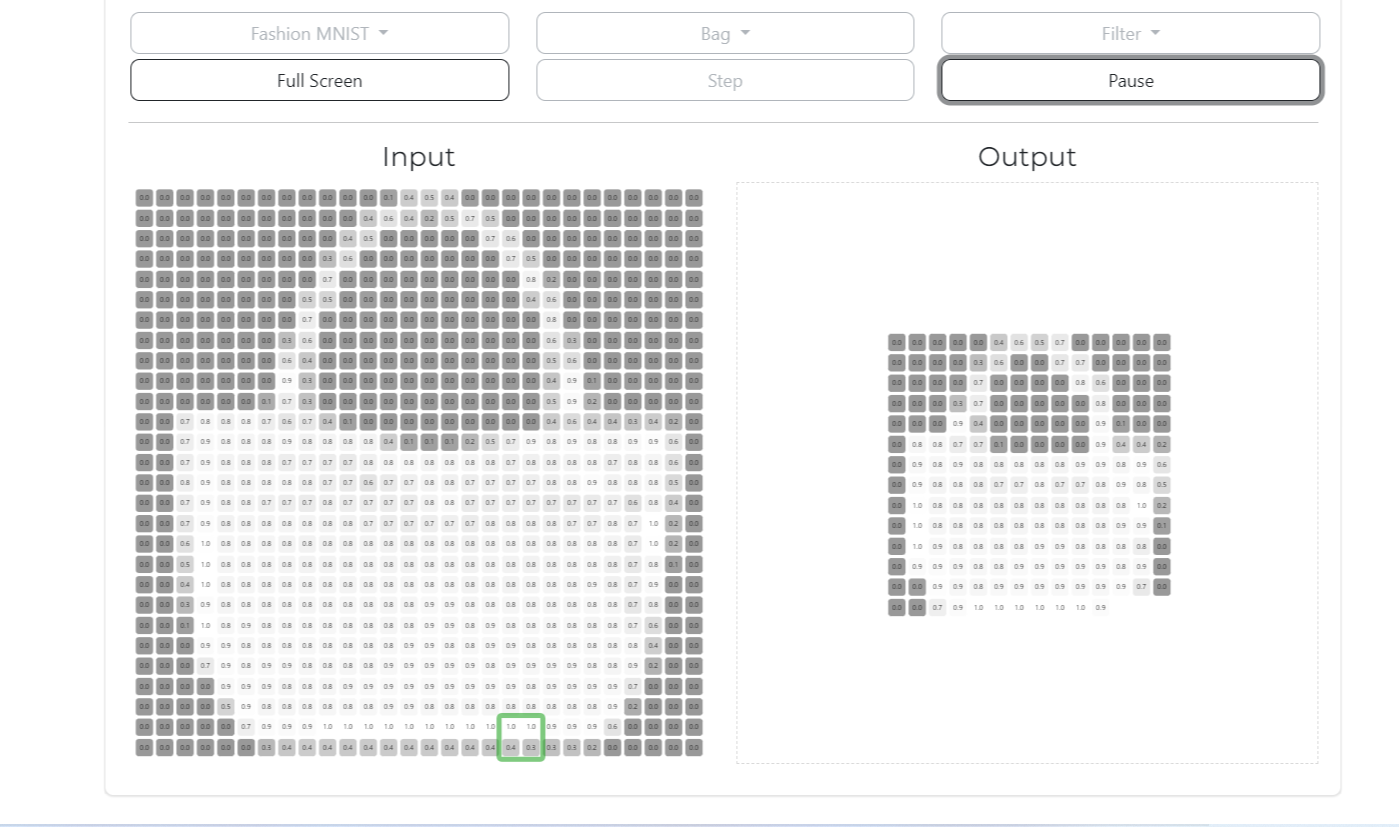

### Explanation of the Code

1. **Input Array**: The input is a 2D NumPy array representing the feature map.
2. **Pooling Function**: Each pooling function (max and average) takes the input array, pooling size, and stride as arguments.
3. **Output Dimensions**: The output dimensions are calculated based on the input size, pooling size, and stride.
4. **Pooling Operation**: A nested loop iterates over the input array, applying the pooling operation (max or average) to the defined window and storing the result in the output array.

### Pooling Operation

- **Types**: The two main types of pooling operations are:
  - **Max Pooling**: This operation selects the maximum value from each region of the feature map defined by a sliding window. It retains the most prominent features while reducing the spatial dimensions.
  - **Average Pooling**: This operation computes the average value of the pixels in each region defined by the sliding window, providing a smoother representation.

- **Purpose**: Pooling helps in reducing the dimensionality of feature maps, which decreases the computational load and helps in making the model more robust to variations in the input (translation invariance). This means that the model can recognize objects regardless of their position in the image.


## Max Pooling

In [32]:
from PIL import Image
import matplotlib.pylab as plt

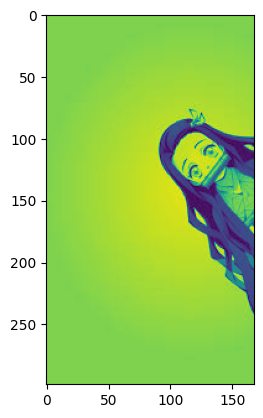

In [33]:
# Load the image
image_path = r'..\..\0. datasets\nezko_on_rt.png'  # Replace with your image path
image = Image.open(image_path)

# Convert to grayscale
image_gray = image.convert('L')  # 'L' mode is for grayscale
input_image = np.array(image_gray)
plt.imshow(input_image)

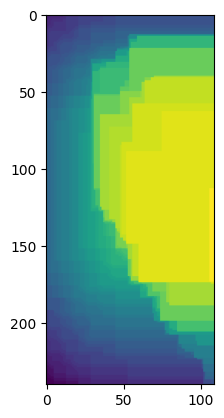

In [47]:
import numpy as np

def max_pooling(input_array, pool_size=(60, 60), stride=1):
    # Determine the dimensions of the input
    n_h, n_w = input_array.shape
    pool_h, pool_w = pool_size

    # Calculate the dimensions of the output
    output_h = (n_h - pool_h) // stride + 1
    output_w = (n_w - pool_w) // stride + 1
    output_array = np.zeros((output_h, output_w))

    # Perform max pooling
    for i in range(0, output_h):
        for j in range(0, output_w):
            h_start = i * stride
            h_end = h_start + pool_h
            w_start = j * stride
            w_end = w_start + pool_w
            output_array[i, j] = np.max(input_array[h_start:h_end, w_start:w_end])

    return output_array

# Example usage
# input_array = np.array([[1, 2, 3, 0],
#                          [5, 6, 7, 1],
#                          [9, 10, 11, 2],
#                          [4, 3, 2, 0]])
input_array = input_image

max_pooled_output = max_pooling(input_array)
plt.imshow(max_pooled_output)
plt.show()

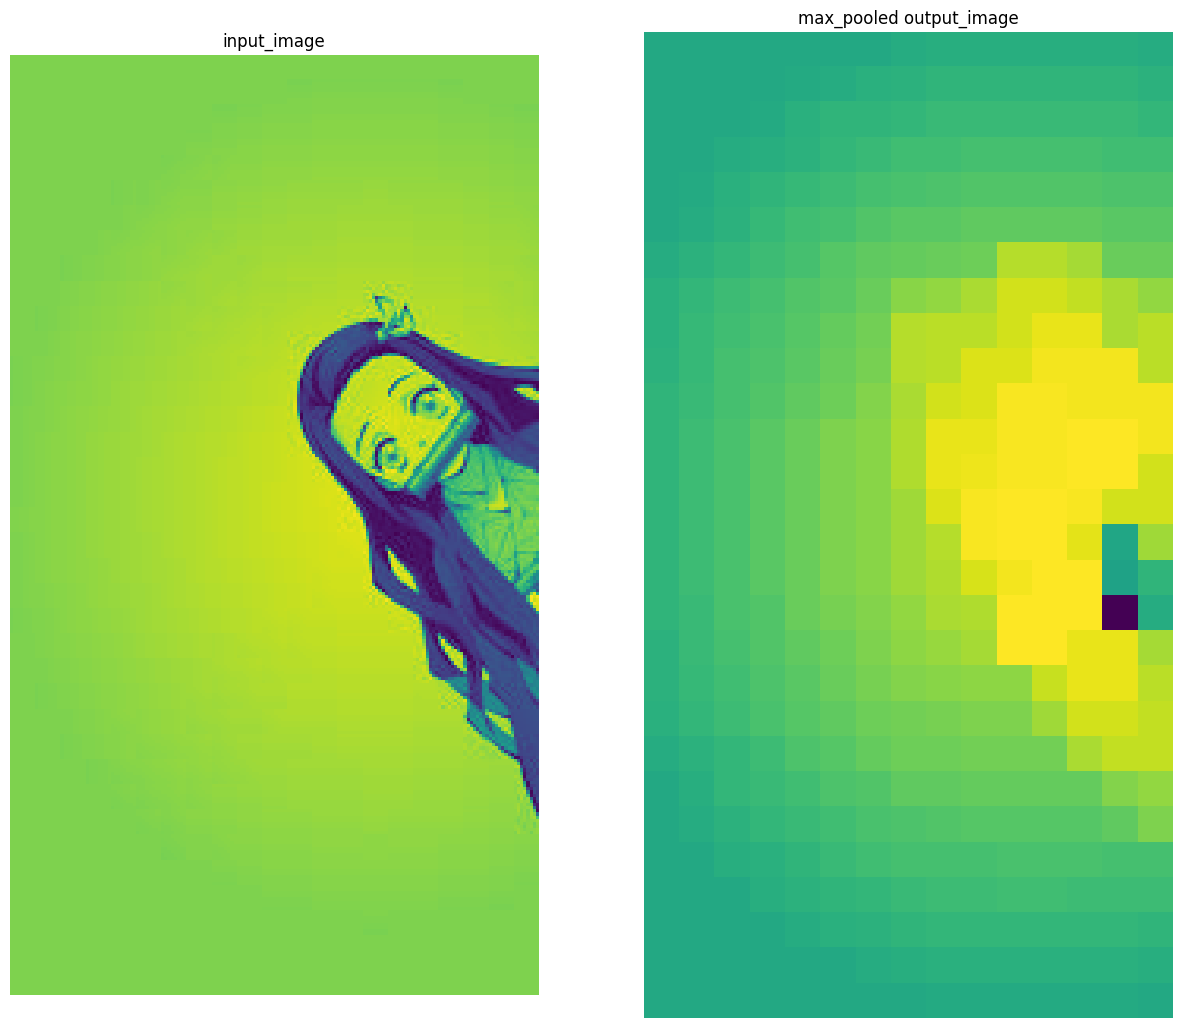

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 50))

ax[0].imshow(input_image)
ax[0].axis(False)
ax[0].set_title('input_image')

ax[1].imshow(max_pooled_output)
ax[1].axis(False)
ax[1].set_title('max_pooled output_image')
plt.show()

## Avg Pooling

In [50]:
def average_pooling(input_array, pool_size=(20, 20), stride=2):
    # Determine the dimensions of the input
    n_h, n_w = input_array.shape
    pool_h, pool_w = pool_size

    # Calculate the dimensions of the output
    output_h = (n_h - pool_h) // stride + 1
    output_w = (n_w - pool_w) // stride + 1
    output_array = np.zeros((output_h, output_w))

    # Perform average pooling
    for i in range(0, output_h):
        for j in range(0, output_w):
            h_start = i * stride
            h_end = h_start + pool_h
            w_start = j * stride
            w_end = w_start + pool_w
            output_array[i, j] = np.mean(input_array[h_start:h_end, w_start:w_end])

    return output_array


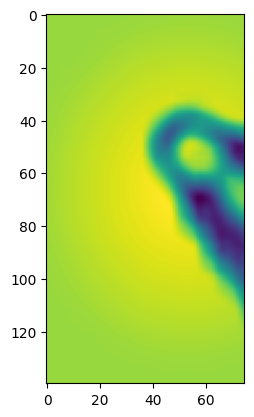

In [51]:
input_array = input_image

# Example usage 
average_pooled_output = average_pooling(input_array)
plt.imshow(average_pooled_output)
plt.show()

# Custom